# Desafio Data Science - Indicium (João Böger)

O presente estudo versa sobre a utilização de ferramentas de Data Science (DS) e modelos de Machine Learning (ML) para compreender a dinâmica de clientes de uma instituição financeira, e prever a saída destes.

## Carregando os dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Patch

import warnings

In [3]:
data_abandono_clientes = pd.read_csv('../data/Abandono_clientes.csv')
data_abandono_teste = pd.read_csv('../data/Abandono_teste.csv', delimiter=';')

In [4]:
data_abandono_clientes.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
data_abandono_teste.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,10001,15798485,Copley,565,France,Male,31,1,0.00,1,0,1,20443.08
1,10002,15588959,T'ang,569,France,Male,34,4,0.00,1,0,1,4045.90
2,10003,15624896,Ku,669,France,Female,20,7,0.00,2,1,0,128838.67
3,10004,15639629,McConnan,694,France,Male,39,4,173255.48,1,1,1,81293.10
4,10005,15638852,Ts'ui,504,Spain,Male,28,10,109291.36,1,1,1,187593.15
5,10006,15645057,Mackenzie,776,France,Male,29,4,0.00,2,0,1,88440.83
6,10007,15687377,Sharpe,585,France,Male,25,7,159301.00,1,1,1,39824.96
7,10008,15795593,Chuang,651,Germany,Male,24,5,158484.85,1,1,1,161234.90
8,10009,15751848,Seely,672,France,Male,45,7,0.00,2,0,0,174177.96
9,10010,15702792,Chienezie,527,France,Male,23,8,0.00,2,1,0,76589.04


## Funções Auxiliares

In [6]:
def plot_hist_dist(column, xlabel, locLegend, data=data_abandono_clientes, range=None, bins=None):
    columnData = data[column]

    fig, axs = plt.subplots(1,2, figsize=(15,6))

    quartiles = np.quantile(columnData, (0.25, 0.5, 0.75))
    labels = ['Q1', 'Q2 (Median)', 'Q3']
    colors = ['red', 'green', 'yellow']

    axs[0].hist(columnData, bins=bins, edgecolor='black', range=range)

    for quartile, label, color in zip(quartiles, labels, colors):
        axs[0].axvline(quartile, linestyle='--', color=color, label=label)

    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel('Frequência')

    sns.boxplot(x = columnData, ax=axs[1])

    axs[0].legend(loc=locLegend)
    
    return fig,axs

## Análise de Dados Exploratória

In [7]:
data_abandono_clientes.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# Numerical columns
numColumns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Nominal categorical columns
catNomColumns = ['Surname', 'Geography','Gender']

# Ordinal columns
ordColumns = ['RowNumber', 'CustomerId']

# Boolean columns
bolColumns = ['HasCrCard', 'IsActiveMember', 'Exited']

### Variáveis Numéricas

In [9]:
countsActive = data_abandono_clientes.groupby(["IsActiveMember", "Exited"])["RowNumber"].count().unstack()
countsCc = data_abandono_clientes.groupby(["HasCrCard", "Exited"])["RowNumber"].count().unstack()

activePercent = countsActive.T.div(countsActive.T.sum()).T
ccPercent = countsCc.T.div(countsCc.T.sum()).T

In [10]:
data_abandono_clientes[numColumns].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


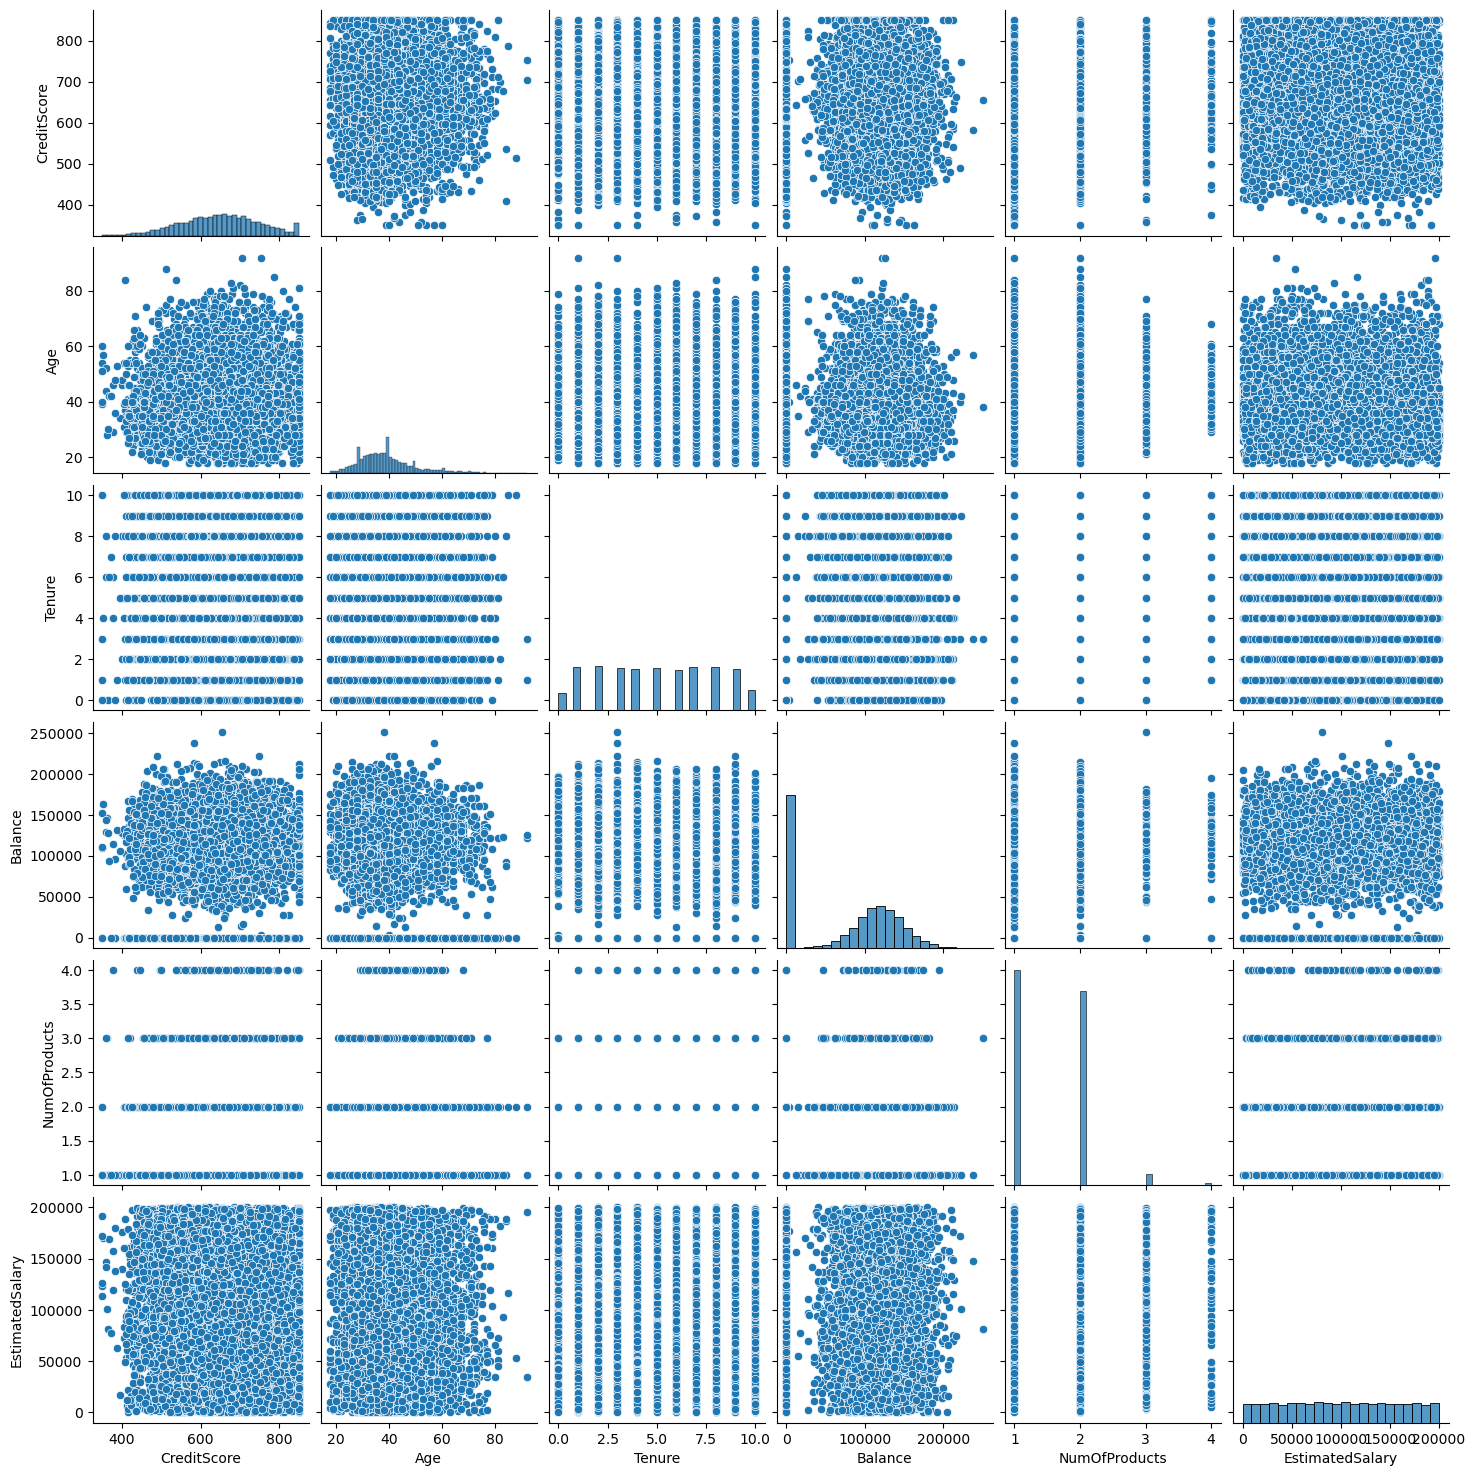

In [11]:
sns.pairplot(data_abandono_clientes[numColumns])
plt.show()

#### Score de crédito

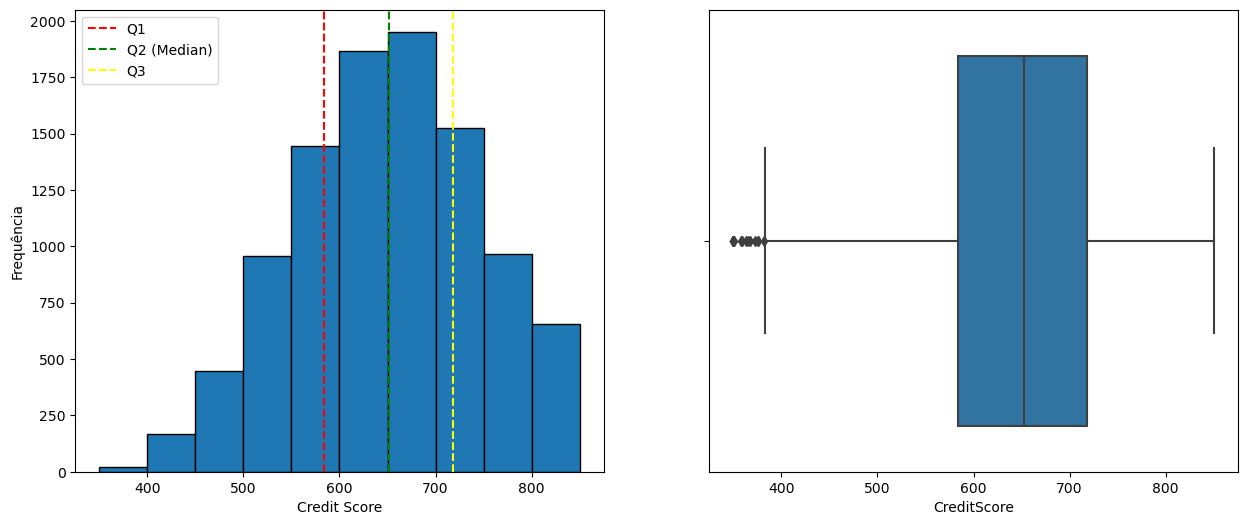

In [12]:
plot_hist_dist(column='CreditScore',xlabel='Credit Score', locLegend='upper left')
plt.show()

#### Balanço monetário

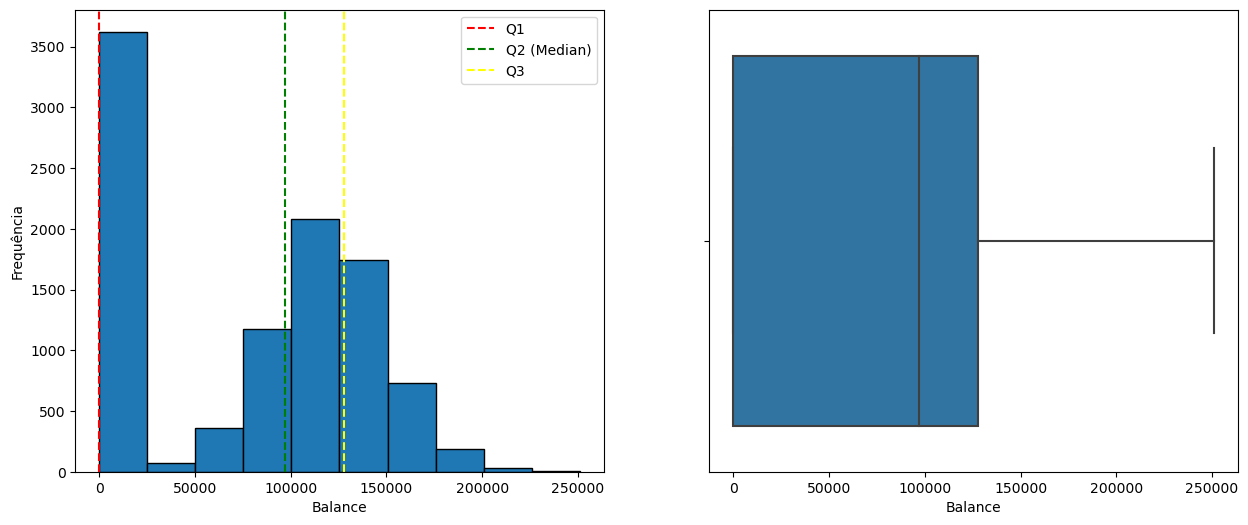

In [13]:
plot_hist_dist('Balance',xlabel='Balance', locLegend='upper right')
plt.show()

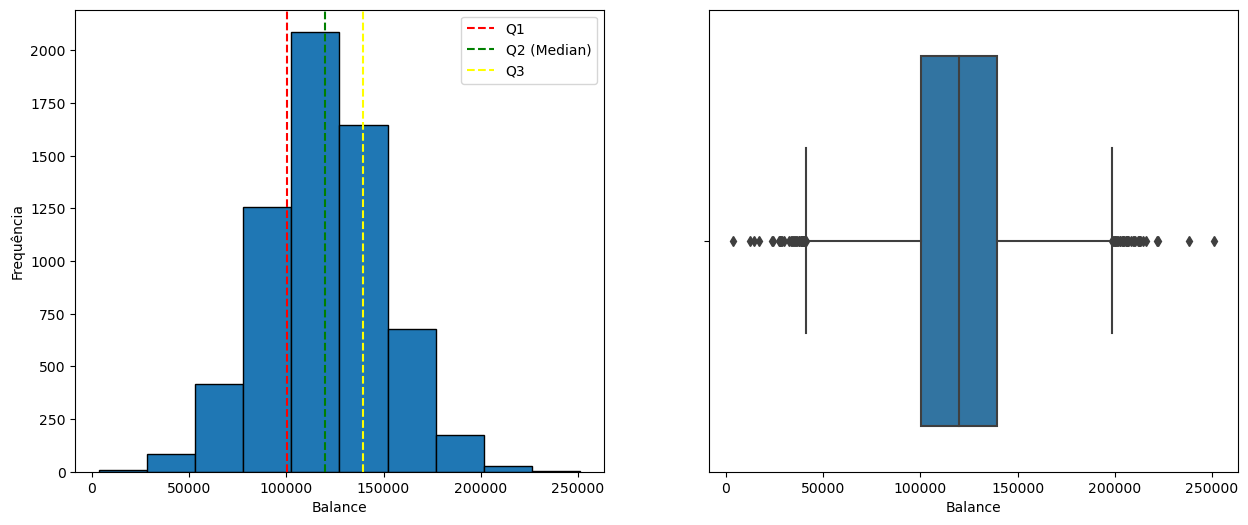

In [14]:
plot_hist_dist(column='Balance',data=data_abandono_clientes.query('Balance > 0'),xlabel='Balance', locLegend='upper right')
plt.show()

#### Renda estimada

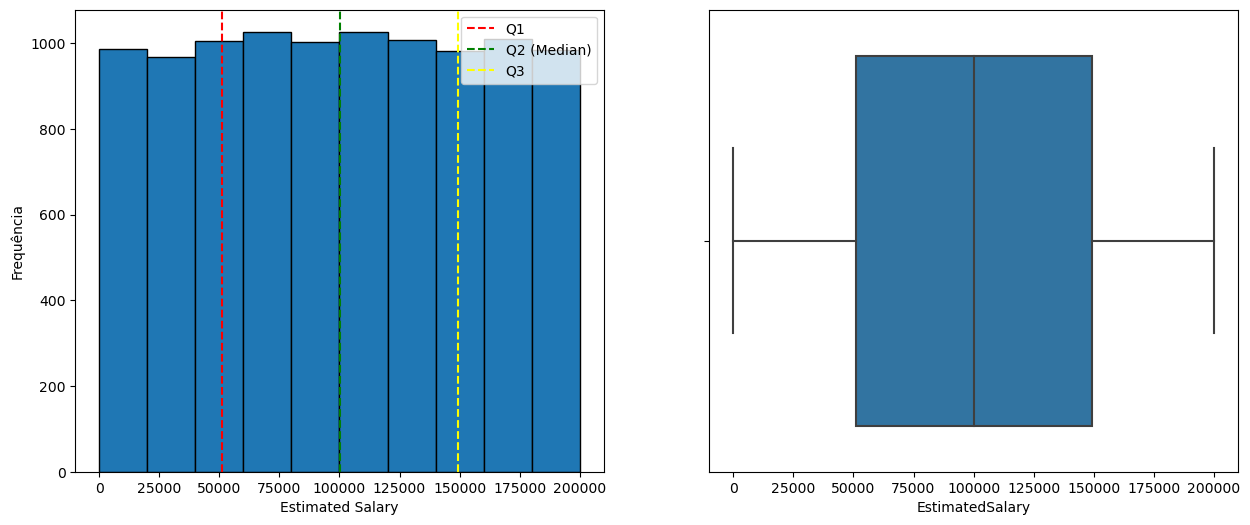

In [15]:
plot_hist_dist(column='EstimatedSalary', xlabel='Estimated Salary', locLegend='upper right')
plt.show()

#### Idade

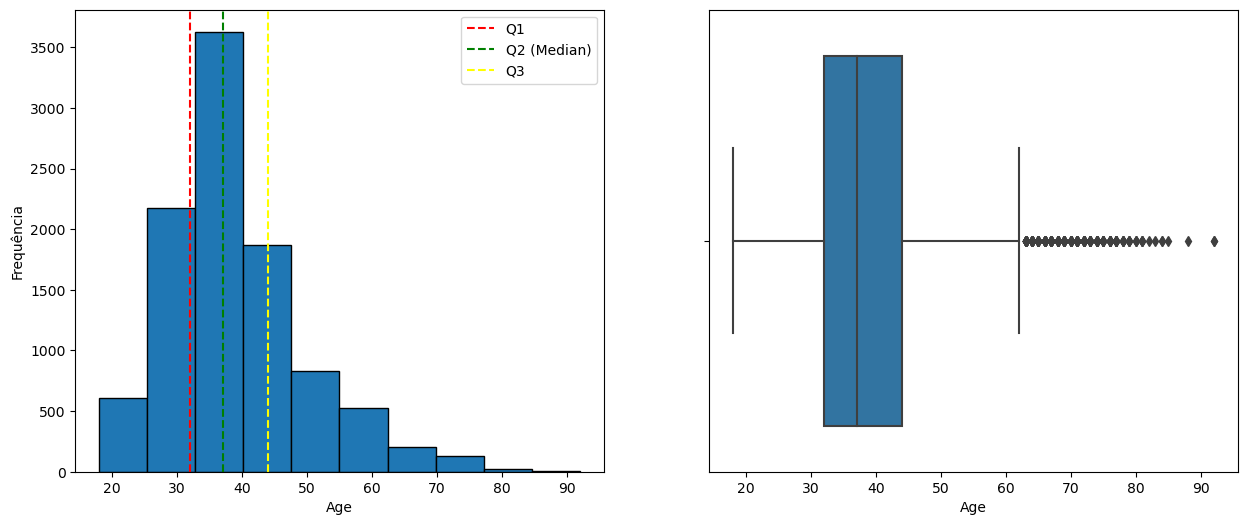

In [16]:
plot_hist_dist(column='Age', xlabel='Age', locLegend='upper right')
plt.show()


#### Tempo de serviço

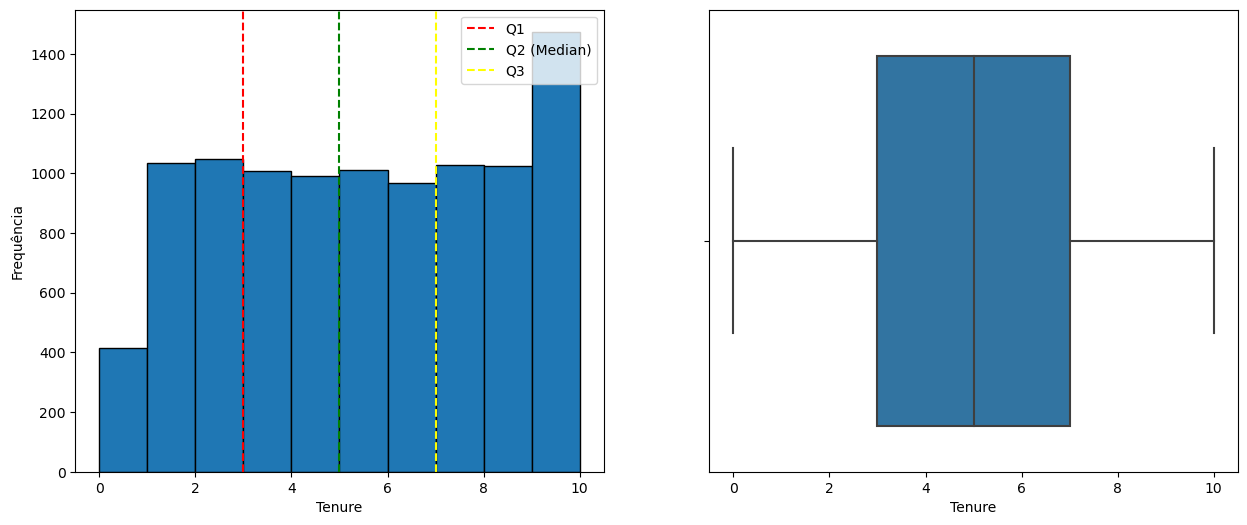

In [17]:
plot_hist_dist(column='Tenure', xlabel='Tenure', locLegend='upper right', bins=10)
plt.show()


#### Número de produtos

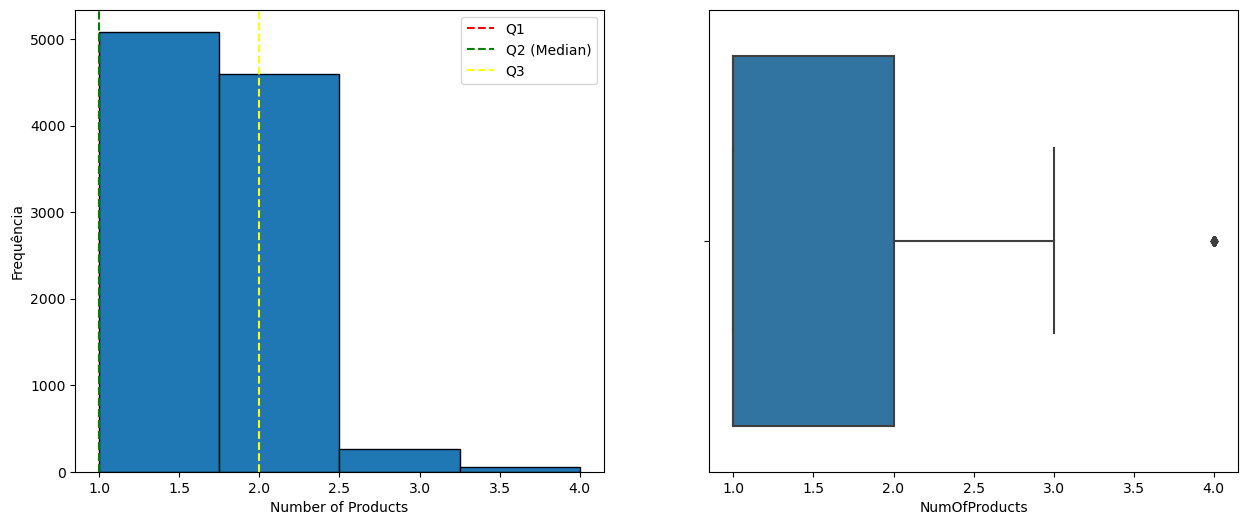

In [18]:
plot_hist_dist(column='NumOfProducts', xlabel='Number of Products', locLegend='upper right', bins=4)
plt.show()


#### Membros ativos

<Figure size 640x480 with 0 Axes>

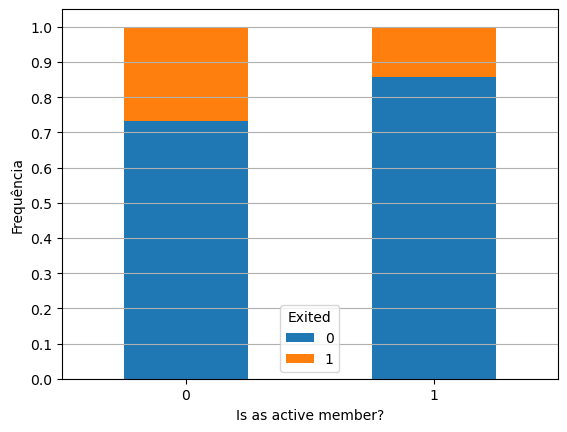

In [19]:
plt.figure()

activePercent.plot(kind="bar", stacked=True)


plt.xlabel('Is as active member?')
plt.ylabel('Frequência')

plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

#### Cartão de crédito

<Figure size 640x480 with 0 Axes>

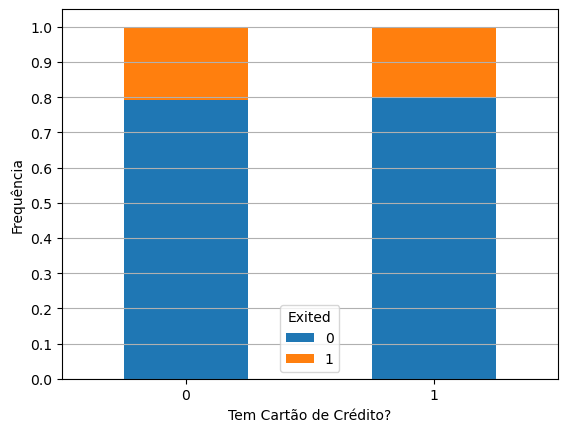

In [20]:
plt.figure()

ccPercent.plot(kind="bar", stacked=True)


plt.xlabel('Tem Cartão de Crédito?')
plt.ylabel('Frequência')

plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

#### Correlação das variáveis numéricas

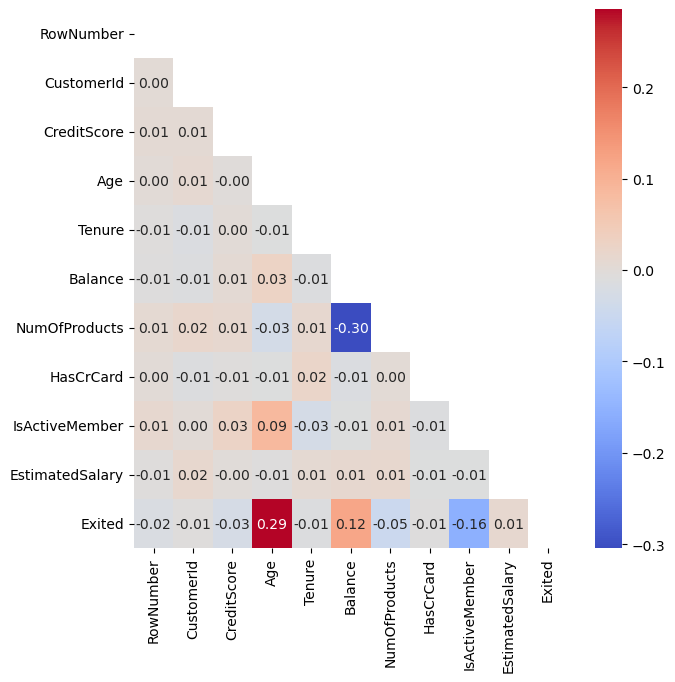

In [21]:
# Calculates the correlation between columns
correlation = data_abandono_clientes.corr()

# Sets the figure size
plt.figure(figsize=(7,7))

# Creates a mask, with upper diagonal elements set to True, and below False
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Creates the heatmap of the correlation
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)

plt.show()

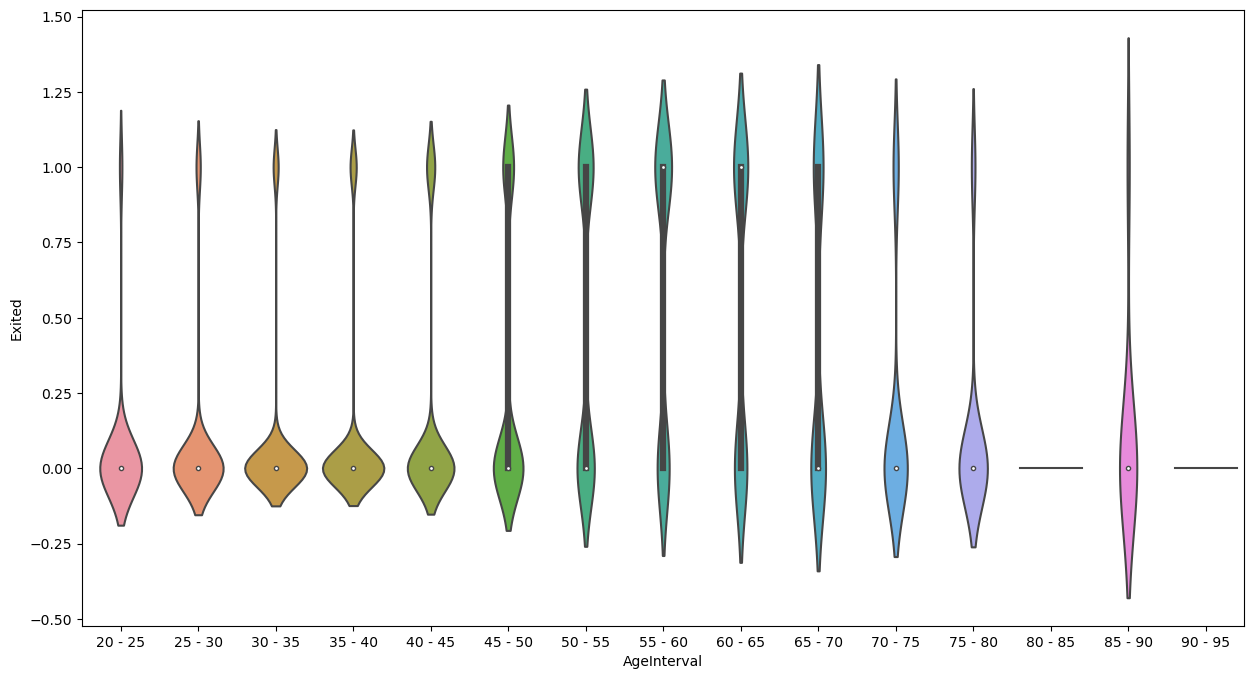

In [22]:
plt.figure(figsize=(15,8))
import math
auxData = data_abandono_clientes.copy()
auxData['AgeInterval'] = pd.cut(x=auxData['Age'], bins=range(math.floor(np.min(auxData['Age'])/5)*5, np.max(auxData['Age']), 5), right=True, labels=[str(x)+' - '+str(x+5) for x in range(math.floor(np.min(auxData['Age'])/5)*5, np.max(auxData['Age']), 5)[1:]])

sns.violinplot(data=auxData,x='AgeInterval',y='Exited')
plt.show()

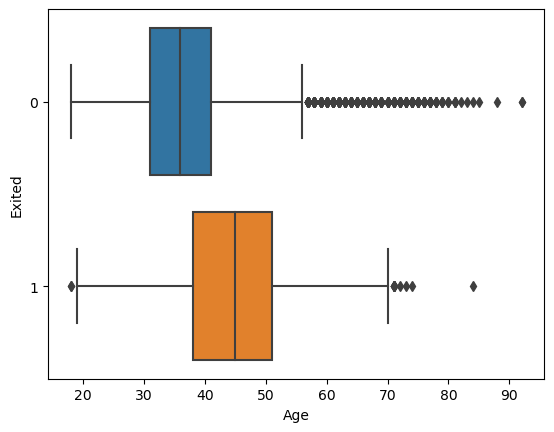

In [23]:
sns.boxplot(data=data_abandono_clientes, x='Age', y='Exited', orient='h')
plt.show()

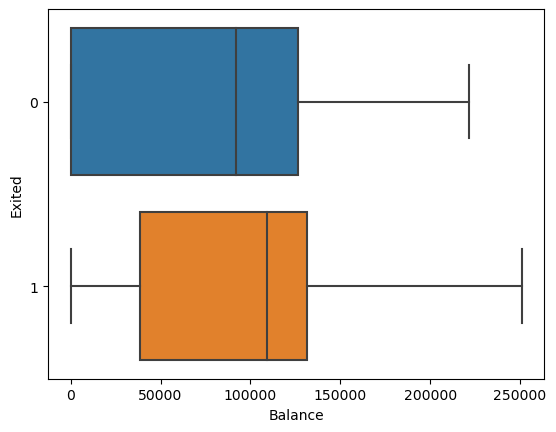

In [24]:
sns.boxplot(data=data_abandono_clientes, x='Balance', y='Exited', orient='h')
plt.show()

### Variáveis categóricas (nominais)

In [25]:
countsGender = data_abandono_clientes.groupby(["Gender", "Exited"])["RowNumber"].count().unstack()
countsGeography = data_abandono_clientes.groupby(["Geography", "Exited"])["RowNumber"].count().unstack()

genderPercent = countsGender.T.div(countsGender.T.sum()).T
geographyPercent = countsGeography.T.div(countsGeography.T.sum()).T

#### Gênero

<Figure size 640x480 with 0 Axes>

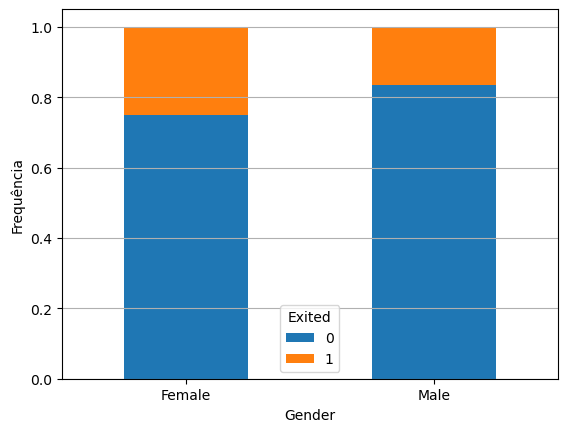

In [26]:
plt.figure()

genderPercent.plot(kind="bar", stacked=True)

plt.grid(axis='y')

plt.xlabel('Gender')
plt.ylabel('Frequência')

plt.xticks(rotation=0)

plt.show()

#### Nacionalidade

<Figure size 640x480 with 0 Axes>

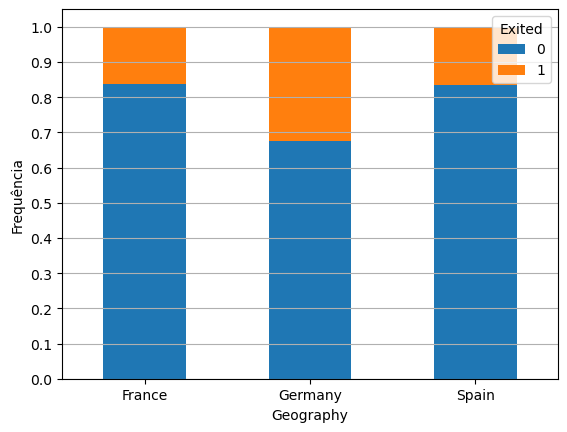

In [27]:
plt.figure()

geographyPercent.plot(kind="bar", stacked=True)


plt.xlabel('Geography')
plt.ylabel('Frequência')

plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

#### Sobrenome

In [28]:
data_abandono_clientes['Surname'].nunique()

2932

In [29]:
# Calculate value counts and percentages of a column
counts = data_abandono_clientes['Surname'].value_counts()
percentages = counts / len(data_abandono_clientes['Surname']) * 100

# Create a new DataFrame to display the results
result_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})

# Sort the DataFrame by count in descending order
result_df = result_df.sort_values('Count', ascending=False)

# Display the result
result_df.head(10)

,Count,Percentage
Smith,32,0.32
Martin,29,0.29
Scott,29,0.29
Walker,28,0.28
Brown,26,0.26
Yeh,25,0.25
Shih,25,0.25
Genovese,25,0.25
Maclean,24,0.24
Wright,24,0.24


In [30]:
result_df.tail(10)

,Count,Percentage
Band,1,0.01
Rubin,1,0.01
Harrell,1,0.01
Welsh,1,0.01
Sousa,1,0.01
Bancroft,1,0.01
Reagan,1,0.01
McNaughtan,1,0.01
Mullen,1,0.01
Burbidge,1,0.01


## Previsão do Churn

### Seleção das variáveis

In [31]:
catColumnsToDrop = ['Surname']
catNomColumns = [col for col in catNomColumns if col not in catColumnsToDrop]


In [32]:
yCol = 'Exited'
XCols = (catNomColumns+bolColumns+numColumns)
XCols = [col for col in XCols if col not in yCol]

In [33]:
X = data_abandono_clientes[XCols]
y = data_abandono_clientes[yCol]

In [34]:
print("Nosso conjunto de variáveis, X, é composto por: {} \nE iremos predizer: {}".format(list(X.columns),yCol))

Nosso conjunto de variáveis, X, é composto por: ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'] 
E iremos predizer: Exited


### Transformações categóricas

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the categorical data
encoded_data = encoder.fit_transform(X[catNomColumns])

# Convert the sparse matrix to a dense array
transformedCat = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())

In [37]:
X.drop(columns=catNomColumns, inplace=True)
X = pd.concat([X, transformedCat], axis=1)


C:\Users\joao\AppData\Local\Temp\ipykernel_10352\3676025101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=catNomColumns, inplace=True)


### Transformações numéricas

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

minMaxScaler = MinMaxScaler()
standardScaler = StandardScaler()

In [39]:
minMaxScaler.fit(X[['Tenure', 'Balance', 'NumOfProducts']])
standardScaler.fit(X[['CreditScore', 'Age', 'EstimatedSalary']])

StandardScaler()

In [40]:
X_standardScaled = standardScaler.transform(X[['CreditScore', 'Age', 'EstimatedSalary']])
X_standardScaled = pd.DataFrame(X_standardScaled, columns=('CreditScore', 'Age', 'EstimatedSalary'))

X_minMaxScaled = minMaxScaler.transform(X[['Tenure', 'Balance', 'NumOfProducts']])
X_minMaxScaled = pd.DataFrame(X_minMaxScaled, columns=('Tenure', 'Balance', 'NumOfProducts'))

X[['CreditScore', 'Age', 'EstimatedSalary']] = X_standardScaled
X[['Tenure', 'Balance', 'NumOfProducts']] = X_minMaxScaled

### Conjuntos de treino e teste

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Split dos dados, com 70% para treino e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Split dos dados de teste entre validação e teste, cada um com 15% do total de dados
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5)

### Treinamento modelos de classificação

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [44]:
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

models = [logistic_regression, decision_tree, random_forest, gradient_boosting]

In [45]:
for model in models:
    model.fit(X_train, y_train)

#### Avaliação de acurácia dos modelos

In [46]:
for model in models:
    print(model.__class__.__name__)
    modelScore = model.score(X_test, y_test)
    print('{:.2f}'.format(modelScore))

LogisticRegression
0.80
DecisionTreeClassifier
0.78
RandomForestClassifier
0.84
GradientBoostingClassifier
0.84


### Tuning dos parâmetros dos modelos

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
logreg_params = {'C': [0.1, 1, 5, 10, 20, 50]}
dt_params = {'max_depth': [None, 5, 10, 25, 50, 100]}
rf_params = {'n_estimators': [100, 200, 300, 500, 1000]}
gb_params = {'n_estimators': [100, 200, 300, 500, 1000], 'learning_rate': [0.5, 0.1, 0.05, 0.01, 0.005]}

tuningParams = [logreg_params, dt_params, rf_params, gb_params]

In [49]:
optm_models = []

for model, params in zip(models, tuningParams):
    model_name = model.__class__.__name__
    model_grid = GridSearchCV(model, params, cv=5)
    model_grid.fit(X_val, y_val)

    model_best_params = model_grid.best_params_
    best_model = model.set_params(**model_best_params)
    best_model.fit(X_train, y_train)

    optm_models.append(best_model)


In [50]:
optm_logistic_regression = optm_models[0]
optm_decision_tree = optm_models[1]
optm_random_forest = optm_models[2]
optm_gradient_boosting = optm_models[3]

In [51]:
optm_LogisticRegression = optm_models[0]

In [52]:
for model in optm_models:
    print(model.__class__.__name__)
    modelScore = model.score(X_test, y_test)
    print('{:.2f}'.format(modelScore))

LogisticRegression
0.80
DecisionTreeClassifier
0.84
RandomForestClassifier
0.84
GradientBoostingClassifier
0.84


### Métricas de desempenho

In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

optm_models_dict = {'Logistic Regression': optm_logistic_regression,
                    'Decision Trees': optm_decision_tree,
                    'Random Forest': optm_random_forest,
                    'Gradient Boosting': optm_gradient_boosting}

metrics = {'Accuracy': accuracy_score,
            'Precision': precision_score,
            'Recall': recall_score,
            'F1 Score': f1_score,
            'ROC Area Under Curve': roc_auc_score}

In [54]:
model_names = list(optm_models_dict.keys())
metric_names = list(metrics.keys())
metric_values = np.zeros((len(models), len(metrics)))

for i, (model_name, model) in enumerate(optm_models_dict.items()):
    for j, (metric_name, metric_func) in enumerate(metrics.items()):
        y_pred = model.predict(X_test)
        score = metric_func(y_test, y_pred)
        metric_values[i, j] = score

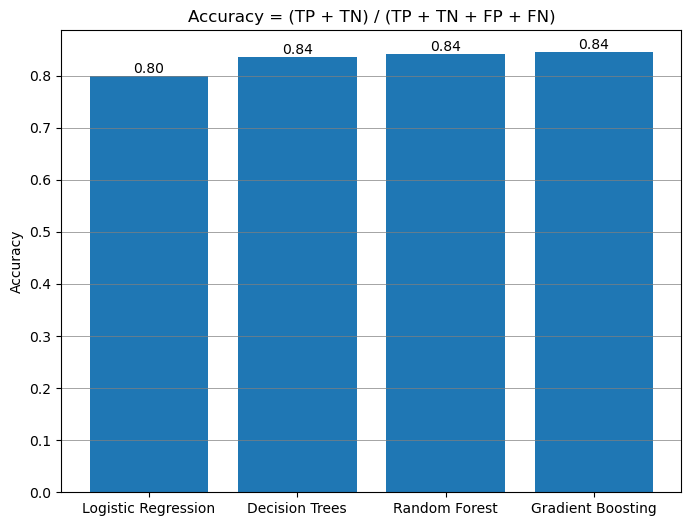

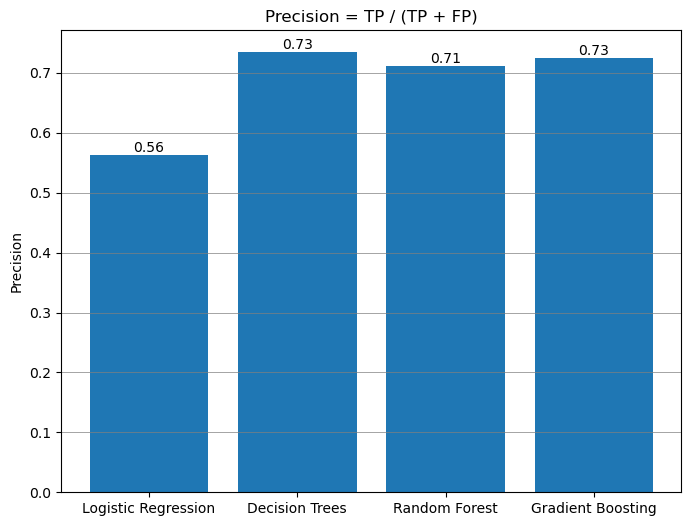

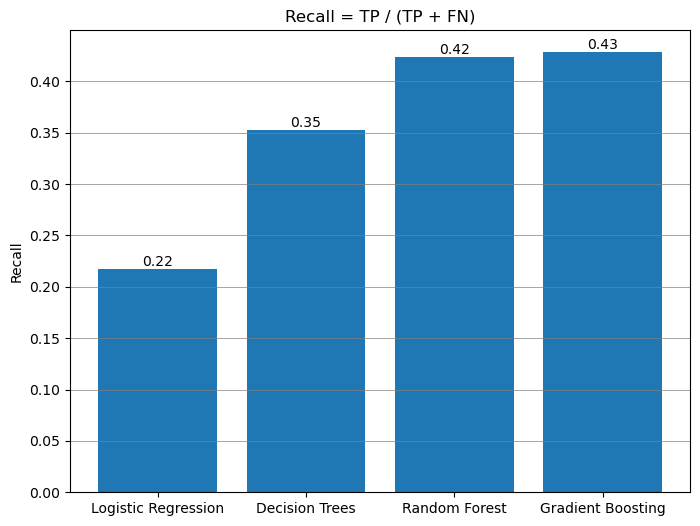

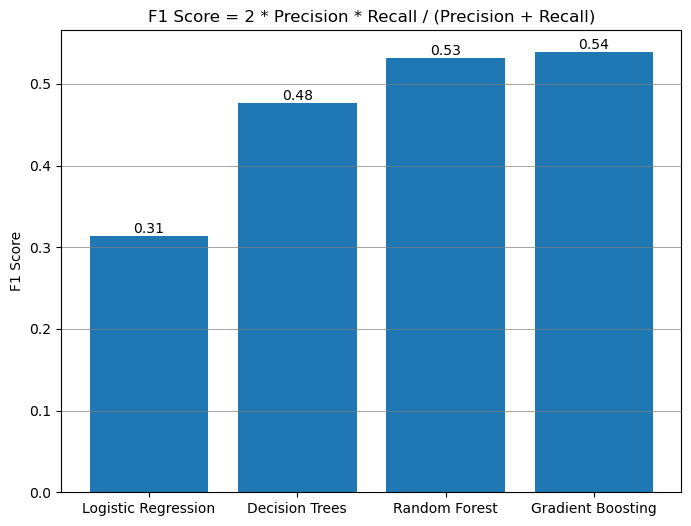

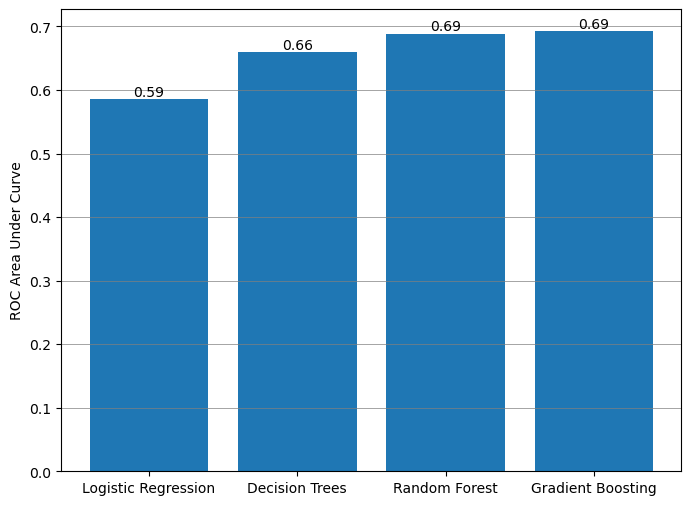

In [55]:
metric_formulas = [
    'Accuracy = (TP + TN) / (TP + TN + FP + FN)',
    'Precision = TP / (TP + FP)',
    'Recall = TP / (TP + FN)',
    'F1 Score = 2 * Precision * Recall / (Precision + Recall)',
    ''
]

# Iterate over metrics
for dic_items, metric_formula in zip(metrics.items(), metric_formulas):
    metric_name, metric_func = dic_items
    plt.figure(figsize=(8,6))  # Create a new plot for each metric
    plt.title(metric_formula)  # Set the title as the metric name

    metric_values = []
    model_names = []

    # Iterate over models
    for model_name, model in optm_models_dict.items():
        y_pred = model.predict(X_test)
        score = metric_func(y_test, y_pred)
        metric_values.append(score)
        model_names.append(model_name)

    plt.bar(model_names, metric_values)
    plt.ylabel(metric_name)

    for i, v in enumerate(metric_values):
        plt.text(i, v, '{:.2f}'.format(v), ha='center', va='bottom')
    
    plt.grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
    
    plt.show()

### Fine-tuning do modelo *Gradient Boosting*

In [56]:
optm_gradient_boosting.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [57]:
gb_params = {'n_estimators': np.arange(50,150,10), 'learning_rate': np.arange(0.01, 0.1, 0.005)}

gb_grid = GridSearchCV(optm_gradient_boosting, gb_params, cv=5)
gb_grid.fit(X, y)

gb_best_params = gb_grid.best_params_
final_model = optm_gradient_boosting.set_params(**model_best_params)

In [58]:
final_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## Pipeline

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
import pickle

In [60]:
# Read the CSV file
data = pd.read_csv('../data/Abandono_clientes.csv')

# Model params
gb_params = {'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.05,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


# Define the numeric features in each group
minMax_features = ['Tenure', 'Balance', 'NumOfProducts']
standard_features = ['CreditScore', 'Age', 'EstimatedSalary']
oneHot_features = ['Geography', 'Gender']

# Define the transformers for each group
minMax_transformer = MinMaxScaler()
standard_transformer = StandardScaler()
oneHot_transformer = OneHotEncoder()

# Define the column transformer steps for each group
preprocessing_steps = ColumnTransformer(
    transformers=[
        ('minMax_numerical', minMax_transformer, minMax_features),
        ('standard_numerical', standard_transformer, standard_features),
        ('oneHot_categorical', oneHot_transformer, oneHot_features)
    ])

# Define the classifier
gb_model = GradientBoostingClassifier(**gb_params)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessing', preprocessing_steps), ('gradient_boosting', gb_model)])

In [61]:
# Split the data into features (X) and target (y)
X = data.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)  # Exclude the target and unused columns
y = data['Exited']

# Fit the pipeline to the data
pipeline.fit(X, y)

# Save the fitted pipeline/model using pickle
with open('./output/prediction_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)

NameError: name 'predictions' is not defined